## 5. Arbitrary Value Imputation
#### this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

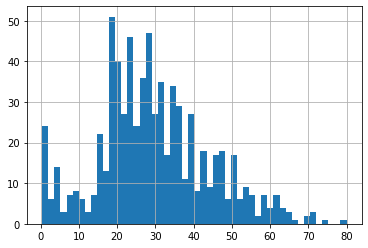

In [4]:
df['Age'].hist(bins=50)

### Advantages
    Easy to implement
    Captures the importance of missingess if there is one
### Disadvantages
    Distorts the original distribution of the variable
    If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
    Hard to decide which value to use

In [5]:
impute_nan(df,'Age')
df.head()

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [6]:
print(df['Age'].std())
print(df['Age_zero'].std())
print(df['Age_hundred'].std())

14.526497332334044
17.596074065915886
30.930372890173594


In [7]:
print(df['Age'].mean())
print(df['Age_zero'].mean())
print(df['Age_hundred'].mean())

29.69911764705882
23.79929292929293
43.66461279461279


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

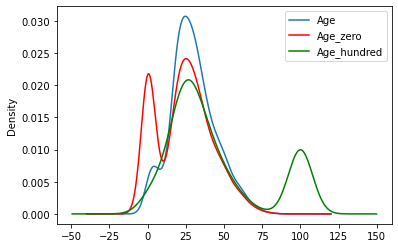

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_zero.plot(kind='kde', ax=ax, color='red')
df.Age_hundred.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')